### Packages

In [2]:
import os
import numpy as np
import requests
import bs4
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
from functools import reduce
plt.style.use('default')

In [3]:
month_list=['01','02','03','04','05','06','07','08','09','10','11','12']#跑月份字串

### 加權指數 (報酬指數)

In [10]:
dfs = pd.DataFrame(columns=['date','total_return_close'])#建立DataFrame
for i in range(2003,2024,1):
    for j in range(0,12,1):

        #請求網站
        url="https://www.twse.com.tw/indicesReport/MFI94U?response=html&date="+str(i)+month_list[j]+"01"
        print(url)
        if i == 2023 and month_list[j] == '07':
            print('finish dfs')
            break
        res = requests.get(url)
        time.sleep(random.uniform(0.1,2.1))
        #解析網站
        soup = bs4.BeautifulSoup(res.text,"html.parser")

        #取得table並整理
        data = soup.select('table')[0]
        df = pd.read_html(data.prettify())[0]
        df.columns=df.columns.get_level_values(1)
        df.columns=[u'date',u'total_return_close']

        #合併DataFrame到dfs
        dfs = pd.concat([dfs,df],ignore_index=True)

        #使用隨機間隔時間抓取網站，避免被鎖
        time.sleep(random.uniform(1.1,5.5))

#將調整民國年調整成西元年
for i in range(len(dfs.date)):
    sp = dfs.date[i].split('/')
    dfs.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]

dfs

https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030101
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030201
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030301
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030401
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030501
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030601
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030701
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030801
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20030901
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20031001
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20031101
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20031201
https://www.twse.com.tw/indicesReport/MFI94U?response=html&date=20040101
https://www.twse.com.tw/indicesReport/MFI94U?respon

C:\Users\s8600\AppData\Local\Temp/ipykernel_9956/3635337602.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]


,date,total_return_close
0,2003/01/02,4524.92
1,2003/01/03,4626.36
2,2003/01/06,4690.26
3,2003/01/07,4701.48
4,2003/01/08,4837.35
...,...,...
5035,2023/06/02,34853.76
5036,2023/06/05,34875.44
5037,2023/06/06,34979.10
5038,2023/06/07,35320.33


In [48]:
dfs = dfs[['date', 'total_return_close']]
dfs.rename(columns = {'total_return_close':'TAIEX'}, inplace=True)
dfs.date = pd.to_datetime(dfs.date, format='%Y/%m/%d')
dfs = dfs.set_index(['date'])

In [49]:
dfs

,TAIEX
date,
2003-01-02,4524.92
2003-01-03,4626.36
2003-01-06,4690.26
2003-01-07,4701.48
2003-01-08,4837.35
...,...
2023-06-02,34853.76
2023-06-05,34875.44
2023-06-06,34979.10


### 台灣50

In [9]:
dfs_50 = pd.DataFrame(columns=['date', 'close', 'total_return_close'])#建立DataFrame
for i in range(2003,2024,1):
    for j in range(0,12,1):

        #請求網站
        url="https://www.twse.com.tw/indicesReport/TAI50I?response=html&date="+str(i)+month_list[j]+"01"
        print(url)
        if i == 2023 and month_list[j] == '07':
            print('finish dfs')
            break
        res = requests.get(url)
        time.sleep(random.uniform(0.1,2.1))
        #解析網站
        soup = bs4.BeautifulSoup(res.text,"html.parser")

        #取得table並整理
        data = soup.select('table')[0]
        df = pd.read_html(data.prettify())[0]
        df.columns=df.columns.get_level_values(1)
        df.columns=[u'date',u'close',u'total_return_close']

        #合併DataFrame到dfs
        dfs_50 = pd.concat([dfs_50,df],ignore_index=True)

        #使用隨機間隔時間抓取網站，避免被鎖
        time.sleep(random.uniform(1.1,5.5))


#將調整民國年調整成西元年
for i in range(len(dfs_50.date)):
    sp = dfs_50.date[i].split('/')
    dfs_50.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]

dfs_50

https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030101
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030201
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030301
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030401
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030501
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030601
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030701
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030801
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20030901
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20031001
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20031101
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20031201
https://www.twse.com.tw/indicesReport/TAI50I?response=html&date=20040101
https://www.twse.com.tw/indicesReport/TAI50I?respon

C:\Users\s8600\AppData\Local\Temp/ipykernel_9956/1130294661.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_50.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]


,date,close,total_return_close
0,2003/01/02,3317.86,3356.61
1,2003/01/03,3409.96,3449.78
2,2003/01/06,3443.89,3484.11
3,2003/01/07,3464.36,3504.81
4,2003/01/08,3552.01,3593.49
...,...,...,...
5047,2023/06/02,12636.08,26573.65
5048,2023/06/05,12590.64,26478.10
5049,2023/06/06,12655.79,26620.97
5050,2023/06/07,12804.36,26933.48


In [44]:
dfs_50 = dfs_50[['date', 'total_return_close']]
dfs_50.rename(columns = {'total_return_close':'TW_50'}, inplace=True)
dfs_50.date = pd.to_datetime(dfs_50.date, format='%Y/%m/%d')
dfs_50 = dfs_50.set_index(['date'])

C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [138]:
# 2003-11-26 數值錯誤，故將成調整為前值
dfs_50.loc['2003-11-26'] = 4674.67

In [139]:
dfs_50

,TW_50
date,
2003-01-02,3356.61
2003-01-03,3449.78
2003-01-06,3484.11
2003-01-07,3504.81
2003-01-08,3593.49
...,...
2023-06-02,26573.65
2023-06-05,26478.10
2023-06-06,26620.97


### 中型100

In [120]:
dfs_100 = pd.DataFrame(columns=['date', 'close', 'total_return_close'])#建立DataFrame
for i in range(2004,2024,1):
    for j in range(0,12,1):
        if i == 2004 and j < 10:
            continue
        #請求網站
        url="https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date="+str(i)+month_list[j]+"01"
        print(url)
        if i == 2023 and month_list[j] == '07':
            print('finish dfs')
            break
        res = requests.get(url)
        time.sleep(random.uniform(0.1,2.1))
        #解析網站
        soup = bs4.BeautifulSoup(res.text,"html.parser")

        #取得table並整理
        data = soup.select('table')[0]
        df = pd.read_html(data.prettify())[0]
        df.columns=df.columns.get_level_values(1)
        df.columns=[u'date',u'close',u'total_return_close']

        #合併DataFrame到dfs
        dfs_100 = pd.concat([dfs_100,df],ignore_index=True)

        #使用隨機間隔時間抓取網站，避免被鎖
        time.sleep(random.uniform(1.1,5.5))


#將調整民國年調整成西元年
for i in range(len(dfs_100.date)):
    sp = dfs_100.date[i].split('/')
    dfs_100.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]

dfs_100

https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20041101
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20041201
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050101
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050201
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050301
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050401
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050501
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050601
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050701
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050801
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20050901
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20051001
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=20051101
https://www.twse.com.tw/rwd/zh/FTSE/TAI100I?response=html&date=2

C:\Users\s8600\AppData\Local\Temp/ipykernel_9956/3131088770.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_100.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]


,date,close,total_return_close
0,2004/11/29,5821.13,6068.04
1,2004/11/30,5873.03,6122.14
2,2004/12/01,5840.34,6088.06
3,2004/12/02,5890.18,6140.02
4,2004/12/03,5905.19,6155.66
...,...,...,...
4573,2023/06/02,15560.48,30571.09
4574,2023/06/05,15679.97,30827.80
4575,2023/06/06,15649.29,30767.48
4576,2023/06/07,15761.20,31015.00


In [121]:
dfs_100 = dfs_100[['date', 'total_return_close']]
dfs_100.rename(columns = {'total_return_close':'mid_100'}, inplace=True)
dfs_100.date = pd.to_datetime(dfs_100.date, format='%Y/%m/%d')
dfs_100 = dfs_100.set_index(['date'])

C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [122]:
dfs_100

,mid_100
date,
2004-11-29,6068.04
2004-11-30,6122.14
2004-12-01,6088.06
2004-12-02,6140.02
2004-12-03,6155.66
...,...
2023-06-02,30571.09
2023-06-05,30827.80
2023-06-06,30767.48


In [119]:
dfs_100.to_csv('C:\Python\Data\Fubon_project_data.csv', index=True)

### 中小型300

In [41]:
url = "https://backend.taiwanindex.com.tw/api/indexes/IR0114/records?start=2018-12-24&end=2023-06-08"
response = requests.get(url)

close1 = response.json()["data"]["datasets"][0]["data"]
close2 = response.json()["data"]["datasets"][1]["data"]
timestamps = response.json()["data"]["labels"]

mid_small_300 = {"date": timestamps, "close": close1, "total_return_close": close2}
df_mid_small_300 = pd.DataFrame(mid_small_300)
df_mid_small_300

,date,close,total_return_close
0,2018/12/24,5023.20,5023.20
1,2018/12/25,4959.28,4959.28
2,2018/12/26,4926.42,4926.42
3,2018/12/27,4993.35,4993.35
4,2018/12/28,5002.89,5002.89
...,...,...,...
1076,2023/06/02,9866.78,11584.5
1077,2023/06/05,9929.83,11666.34
1078,2023/06/06,9907.41,11640.77
1079,2023/06/07,9975.65,11727.12


In [42]:
df_mid_small_300 = df_mid_small_300[['date', 'total_return_close']]
df_mid_small_300.rename(columns = {'total_return_close':'mid_small_300'}, inplace=True)
df_mid_small_300.date = pd.to_datetime(df_mid_small_300.date, format='%Y/%m/%d')
df_mid_small_300 = df_mid_small_300.set_index(['date'])

C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
df_mid_small_300

,mid_small_300
date,
2018-12-24,5023.20
2018-12-25,4959.28
2018-12-26,4926.42
2018-12-27,4993.35
2018-12-28,5002.89
...,...
2023-06-02,11584.5
2023-06-05,11666.34
2023-06-06,11640.77


### 小型300

In [12]:
dfs_300 = pd.DataFrame(columns=['date', 'close', 'total_return_close'])#建立DataFrame
for i in range(2015,2024,1):
    for j in range(0,12,1):
        if i == 2015 and j < 11:
            continue
        #請求網站
        url="https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date="+str(i)+month_list[j]+"01"
        print(url)
        if i == 2023 and month_list[j] == '07':
            print('finish dfs')
            break
        res = requests.get(url)
        time.sleep(random.uniform(0.1,2.1))
        #解析網站
        soup = bs4.BeautifulSoup(res.text,"html.parser")

        #取得table並整理
        data = soup.select('table')[0]
        df = pd.read_html(data.prettify())[0]
        df.columns=df.columns.get_level_values(1)
        df.columns=[u'date',u'close',u'total_return_close']

        #合併DataFrame到dfs
        dfs_300 = pd.concat([dfs_300,df],ignore_index=True)

        #使用隨機間隔時間抓取網站，避免被鎖
        time.sleep(random.uniform(1.1,5.5))


#將調整民國年調整成西元年
for i in range(len(dfs_300.date)):
    sp = dfs_300.date[i].split('/')
    dfs_300.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]

dfs_300

https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20151201
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160101
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160201
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160301
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160401
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160501
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160601
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160701
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160801
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20160901
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20161001
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20161101
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20161201
https://www.twse.com.tw/rwd/zh/TAIEX/SC300?response=html&date=20170101
https:

C:\Users\s8600\AppData\Local\Temp/ipykernel_9956/2710004346.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_300.date[i]=str(int(sp[0])+1911) + '/' + sp[1]  + '/' + sp[2]


,date,close,total_return_close
0,2015/12/14,5000.00,5000.00
1,2015/12/15,5058.18,5058.18
2,2015/12/16,5120.43,5120.43
3,2015/12/17,5180.56,5180.56
4,2015/12/18,5163.49,5163.49
...,...,...,...
1822,2023/06/02,9510.17,12655.98
1823,2023/06/05,9587.26,12758.56
1824,2023/06/06,9562.50,12727.51
1825,2023/06/07,9633.89,12825.18


In [50]:
dfs_300 = dfs_300[['date', 'total_return_close']]
dfs_300.rename(columns = {'total_return_close':'small_300'}, inplace=True)
dfs_300.date = pd.to_datetime(dfs_300.date, format='%Y/%m/%d')
dfs_300 = dfs_300.set_index(['date'])

C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\envs\main.py\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
dfs_300

,small_300
date,
2015-12-14,5000.00
2015-12-15,5058.18
2015-12-16,5120.43
2015-12-17,5180.56
2015-12-18,5163.49
...,...
2023-06-02,12655.98
2023-06-05,12758.56
2023-06-06,12727.51


### 合併表格

In [129]:
dfs_100

,mid_100
date,
2004-11-29,6068.04
2004-11-30,6122.14
2004-12-01,6088.06
2004-12-02,6140.02
2004-12-03,6155.66
...,...
2023-06-02,30571.09
2023-06-05,30827.80
2023-06-06,30767.48


In [144]:
data_frames = [dfs, dfs_50, dfs_100, df_mid_small_300, dfs_300]

In [145]:
df_all = reduce(lambda left, right: pd.merge(left, right, right_index=True, left_index=True, how='outer'), data_frames)
df_all.to_csv('C:\Python\Data\Fubon_project_data.csv', index=True)

In [146]:
df_all

,TAIEX,TW_50,mid_100,mid_small_300,small_300
date,,,,,
2003-01-02,4524.92,3356.61,NaN,NaN,NaN
2003-01-03,4626.36,3449.78,NaN,NaN,NaN
2003-01-06,4690.26,3484.11,NaN,NaN,NaN
2003-01-07,4701.48,3504.81,NaN,NaN,NaN
2003-01-08,4837.35,3593.49,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-02,34853.76,26573.65,30571.09,11584.5,12655.98
2023-06-05,34875.44,26478.10,30827.80,11666.34,12758.56
2023-06-06,34979.10,26620.97,30767.48,11640.77,12727.51


### 重新載入資料

In [3]:
df_all = pd.read_csv('C:\Python\Data\Fubon_project_data.csv', index_col=0, na_values='n/a')

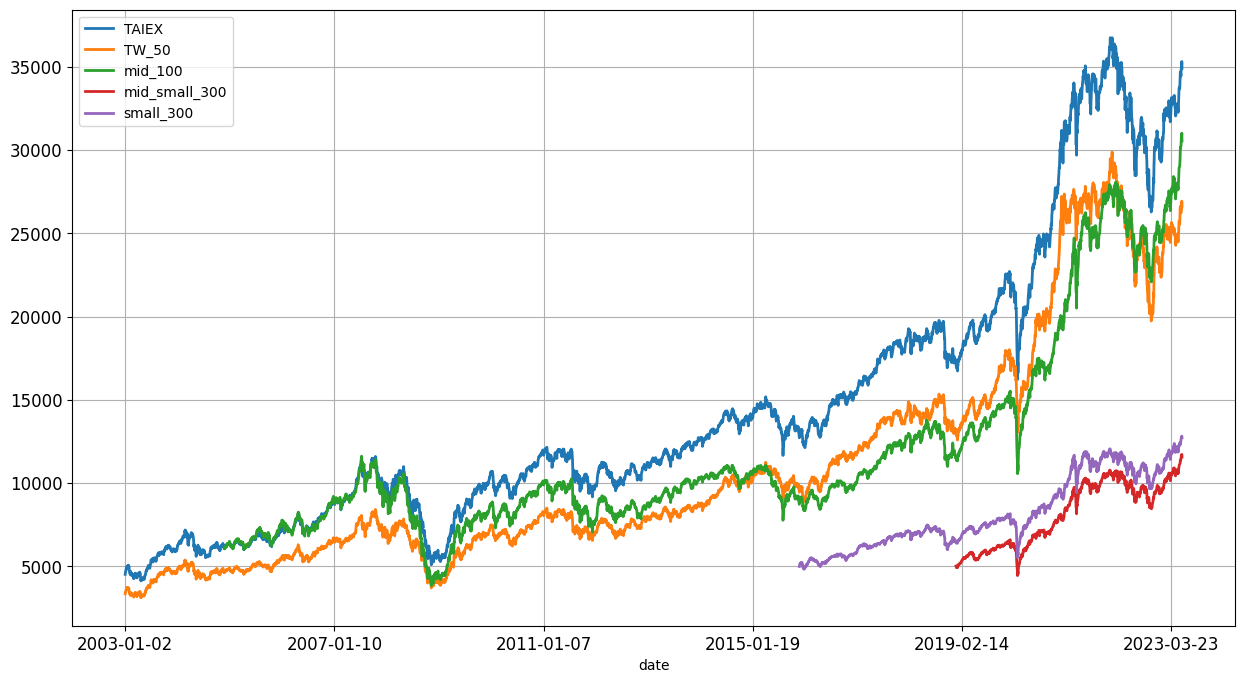

In [4]:
df_all.plot(grid=True, figsize=(15, 8), fontsize=12, linewidth=2, x_compat=True)
plt.show()